In [1]:
from pathlib import Path
import os
import sys

base_path = Path("../")

sys.path.append(os.path.join(base_path, 'src'))

from utils import *

In [2]:
output_file = base_path / "data" / "raw" / "charlotte-puma.csv"
output_file

df = pd.read_csv(output_file)


# Plotting

## Population

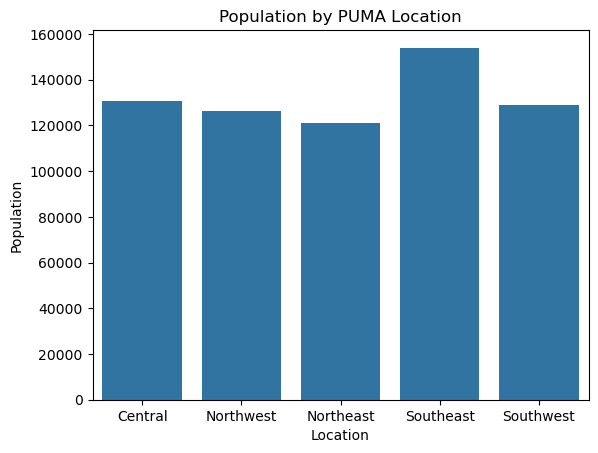

In [3]:
#plt.pie(out_df['total_population'], labels=out_df['name'])

f, ax = plt.subplots()
sns.barplot(df, x='location', y='total_population')
#ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Location')
ax.set_ylabel('Population')
ax.set_title('Population by PUMA Location')
plt.show()

## Race

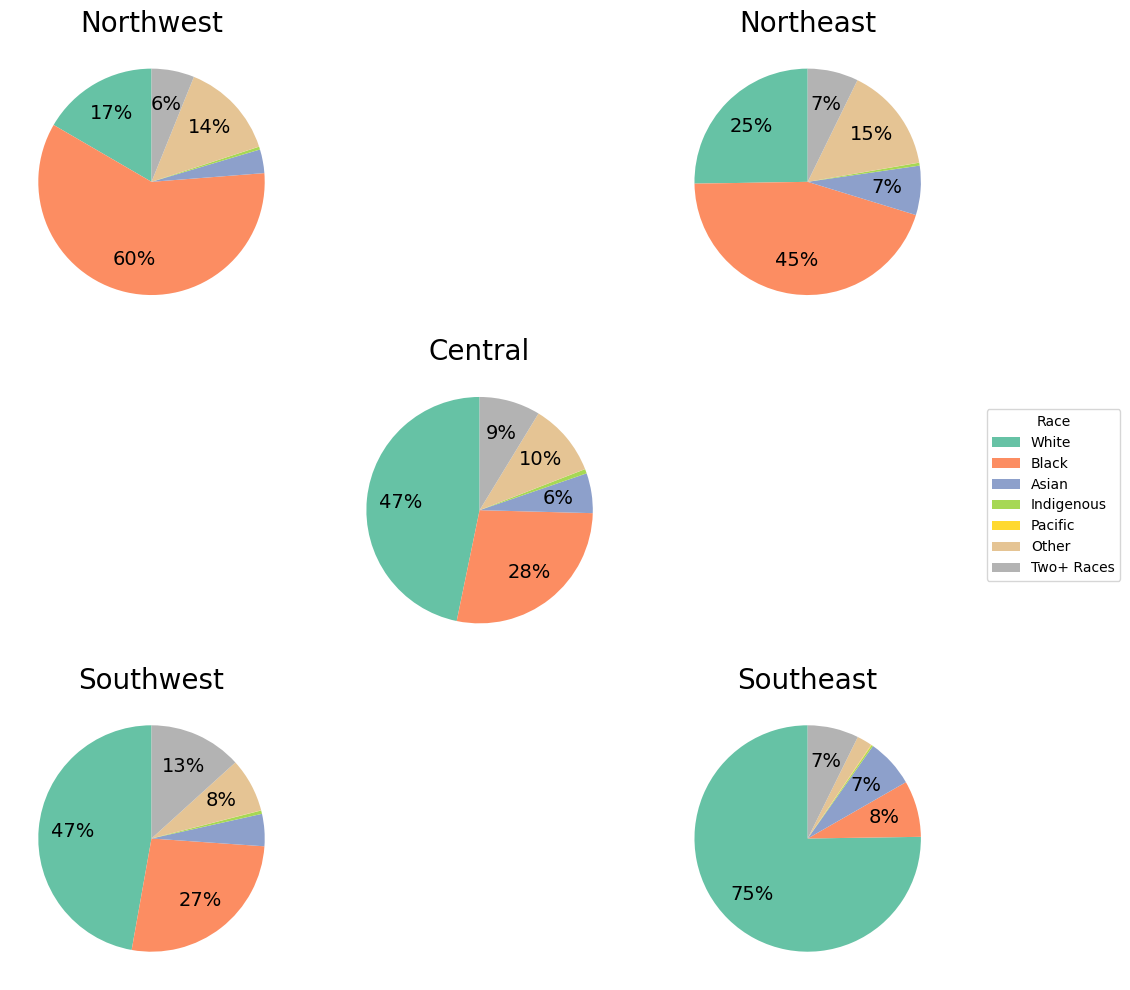

In [4]:
race_pie_chart(df, title_fs=20, wedge_fs=14)

## Hispanic or Not

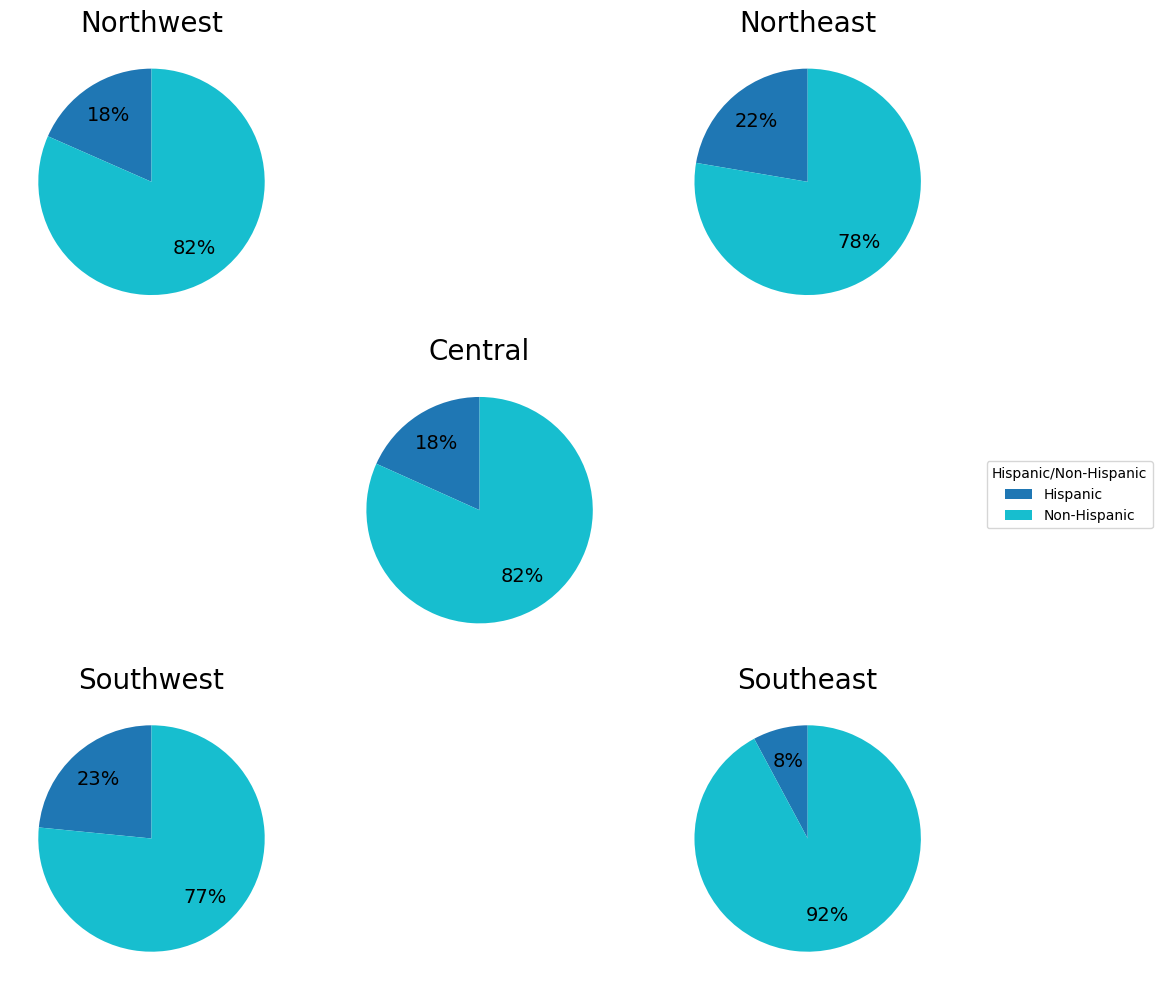

In [5]:
plot_hispanic(df, cmap_name='tab10')

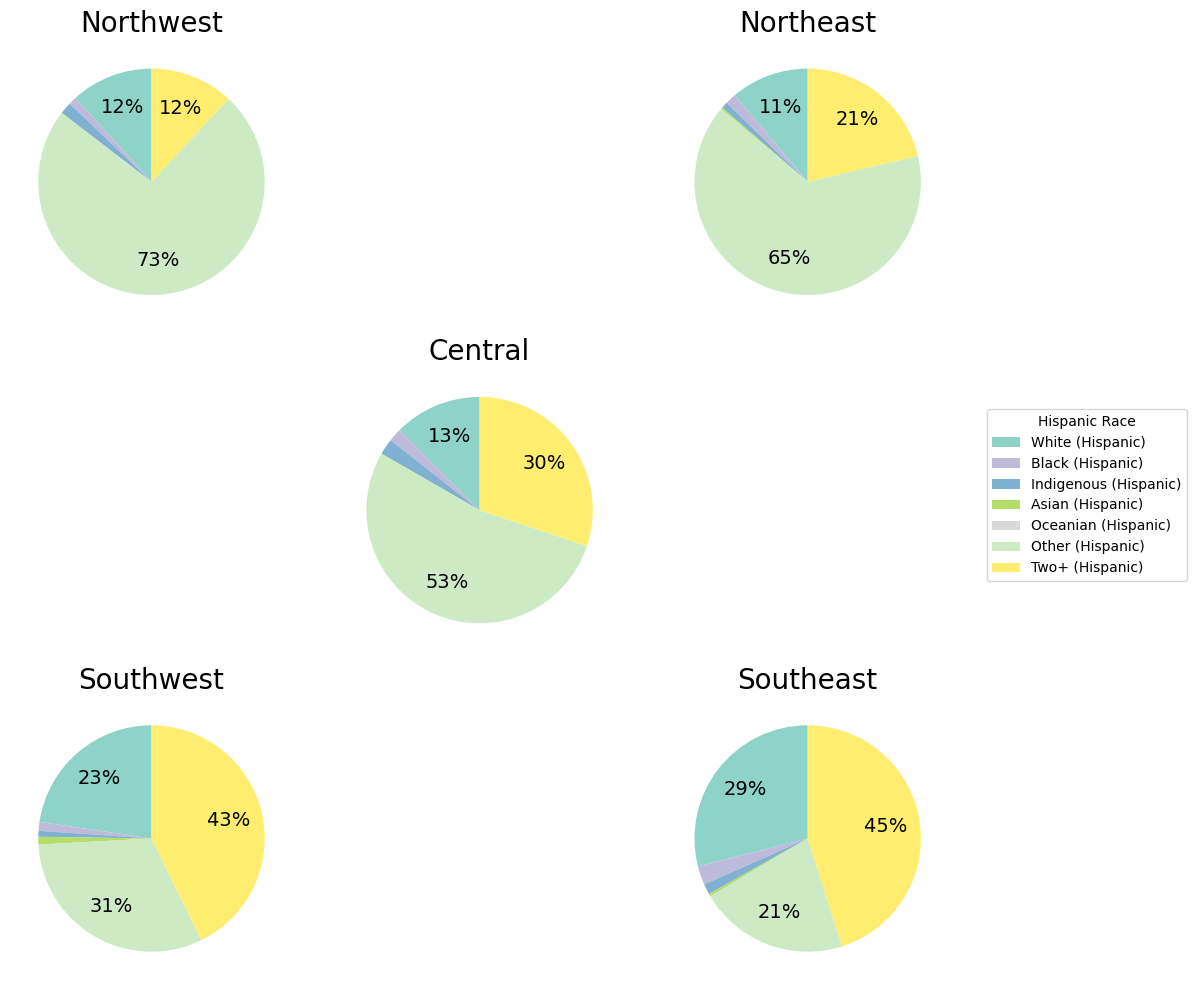

In [6]:
plot_hispanic_race(df, cmap_name='Set3')

## Citizenship

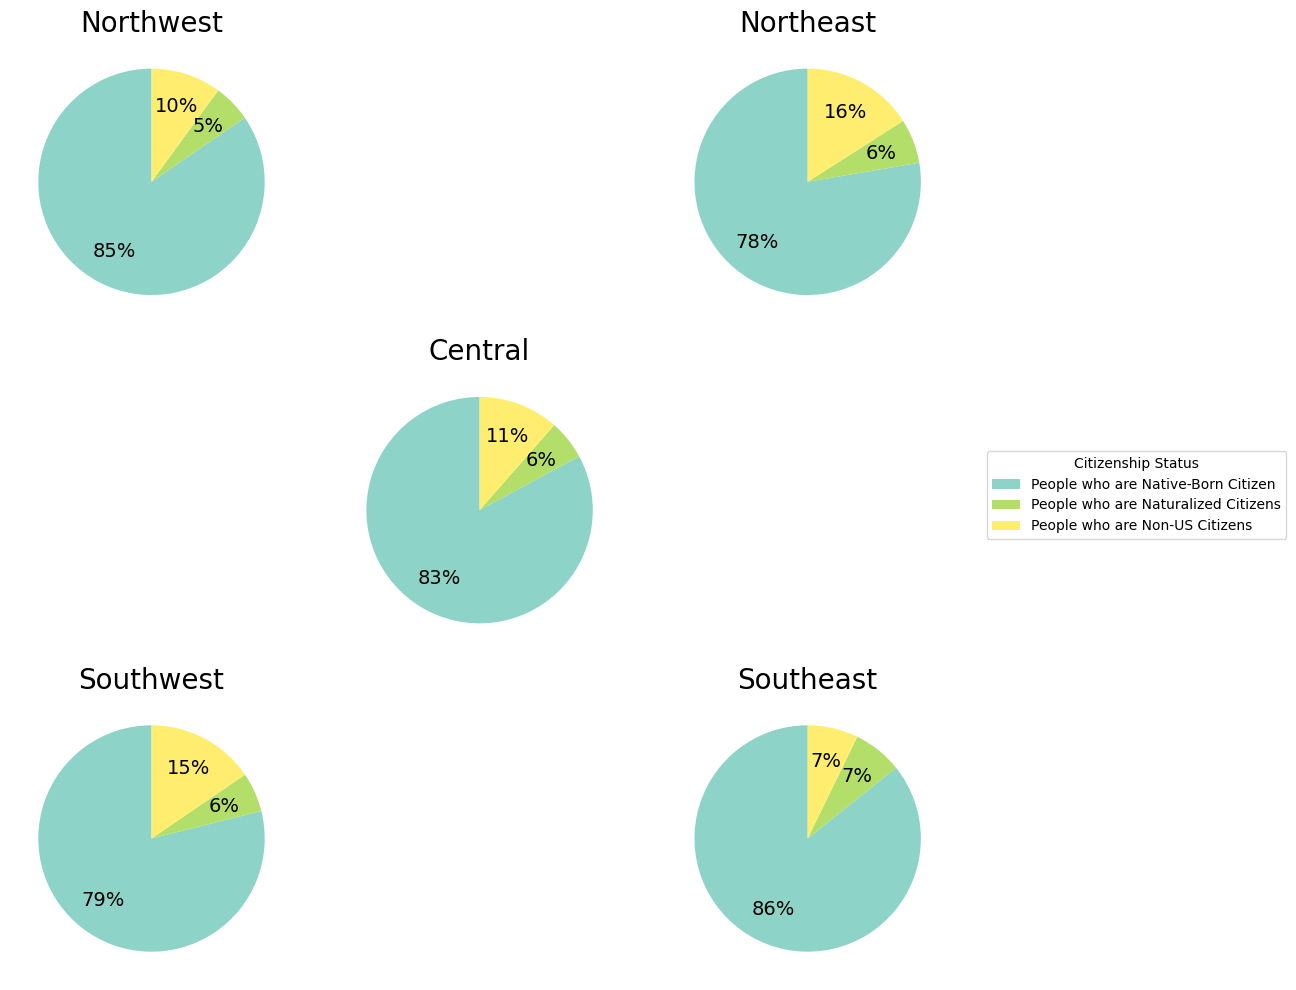

In [7]:
nativity_pie_chart(df, version='simple')#, cmap_name='Set3')

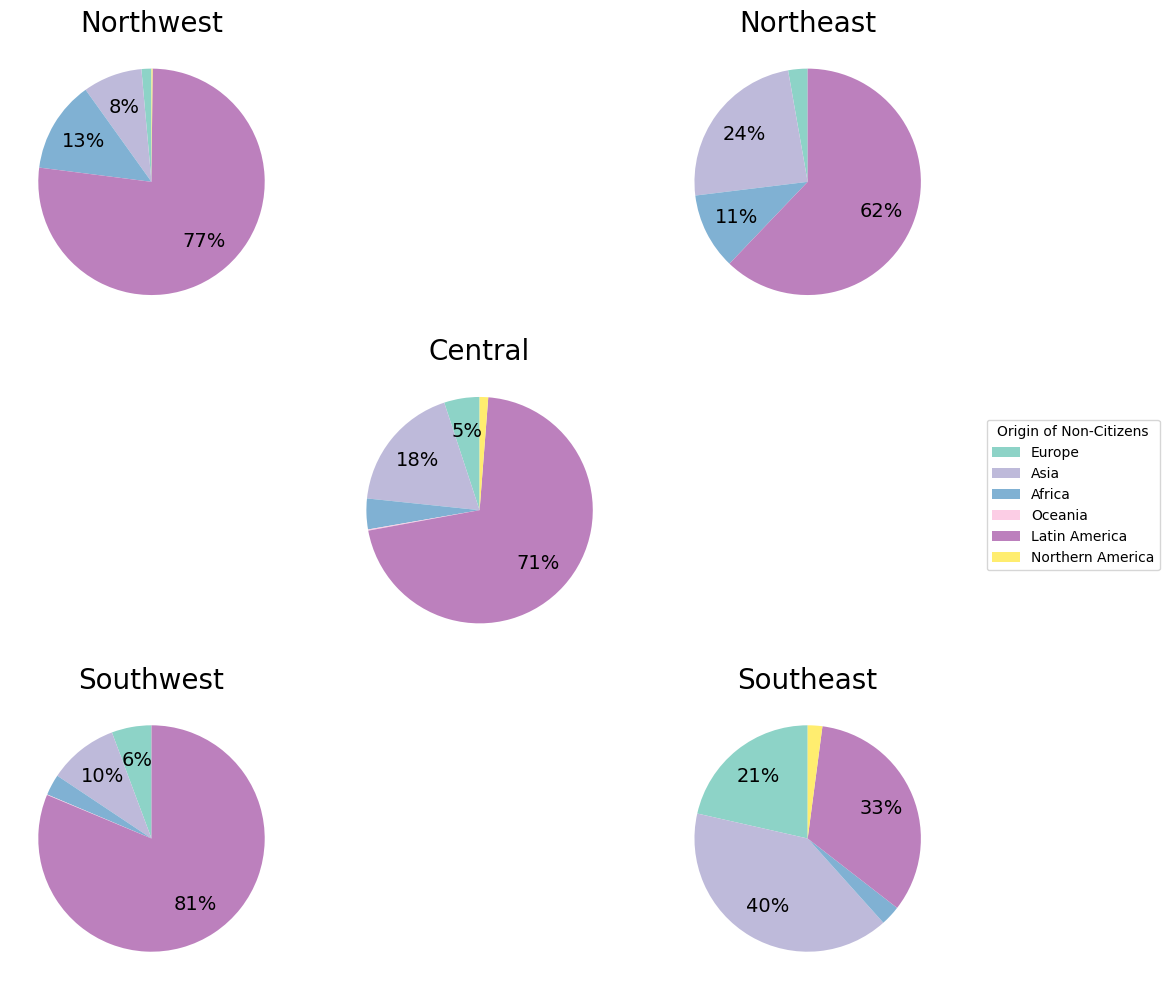

In [8]:
nativity_pie_chart(df, version='non-citizens')#, cmap_name='Set3')

## Economics

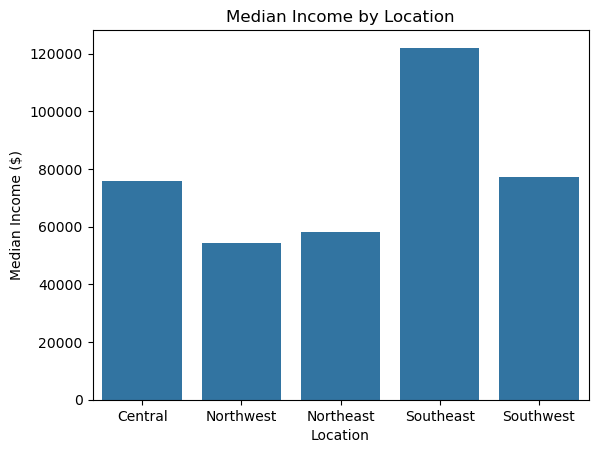

In [9]:

f, ax = plt.subplots()
sns.barplot(df, x='location', y='median_income')
ax.set_xlabel('Location')
ax.set_ylabel('Median Income ($)')
ax.set_title('Median Income by Location')
plt.show()

Text(0.5, 1.0, 'Poverty Rate by Location')

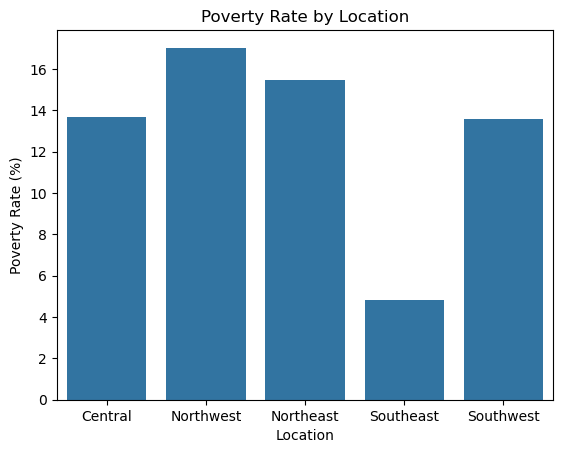

In [10]:
f, ax = plt.subplots()
sns.barplot(df, x='location', y='poverty_rate_pct', ax=ax)
ax.set_xlabel('Location')
ax.set_ylabel('Poverty Rate (%)')
ax.set_title('Poverty Rate by Location')

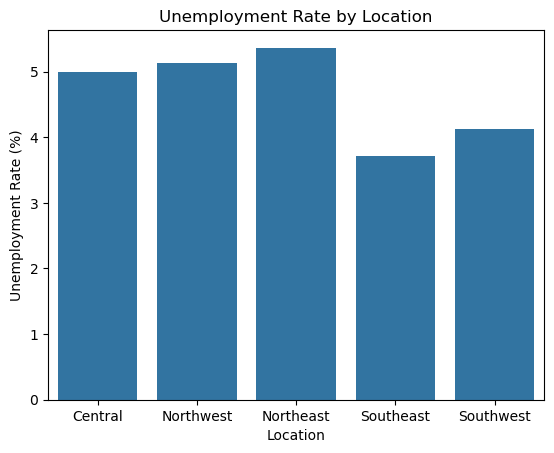

In [11]:
f, ax = plt.subplots()
sns.barplot(df, x='location', y='unemployment_rate_pct')
ax.set_xlabel('Location')
ax.set_ylabel('Unemployment Rate (%)')
ax.set_title('Unemployment Rate by Location')
#ax.tick_params(axis='x', labelrotation=90)
plt.show()

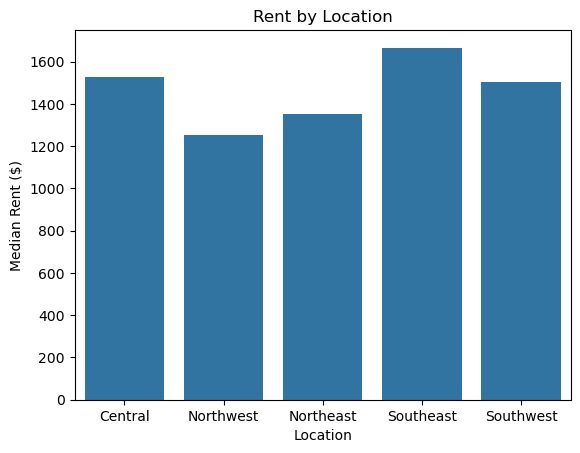

In [12]:
f,ax = plt.subplots()
sns.barplot(df, x='location', y='median_rent')
ax.set_xlabel('Location')
ax.set_ylabel('Median Rent ($)')
ax.set_title('Rent by Location')
plt.show()

Text(0.5, 1.0, 'Rent as Percent of Income by Location')

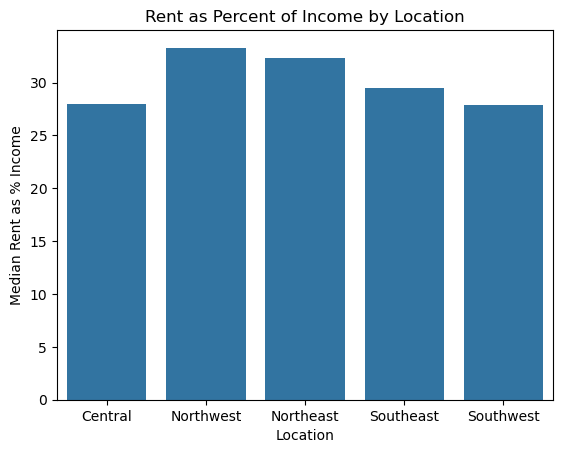

In [13]:
f,ax = plt.subplots()
sns.barplot(df, x='location', y='median_rent_pct_income')
ax.set_xlabel('Location')
ax.set_ylabel('Median Rent as % Income')
ax.set_title('Rent as Percent of Income by Location')

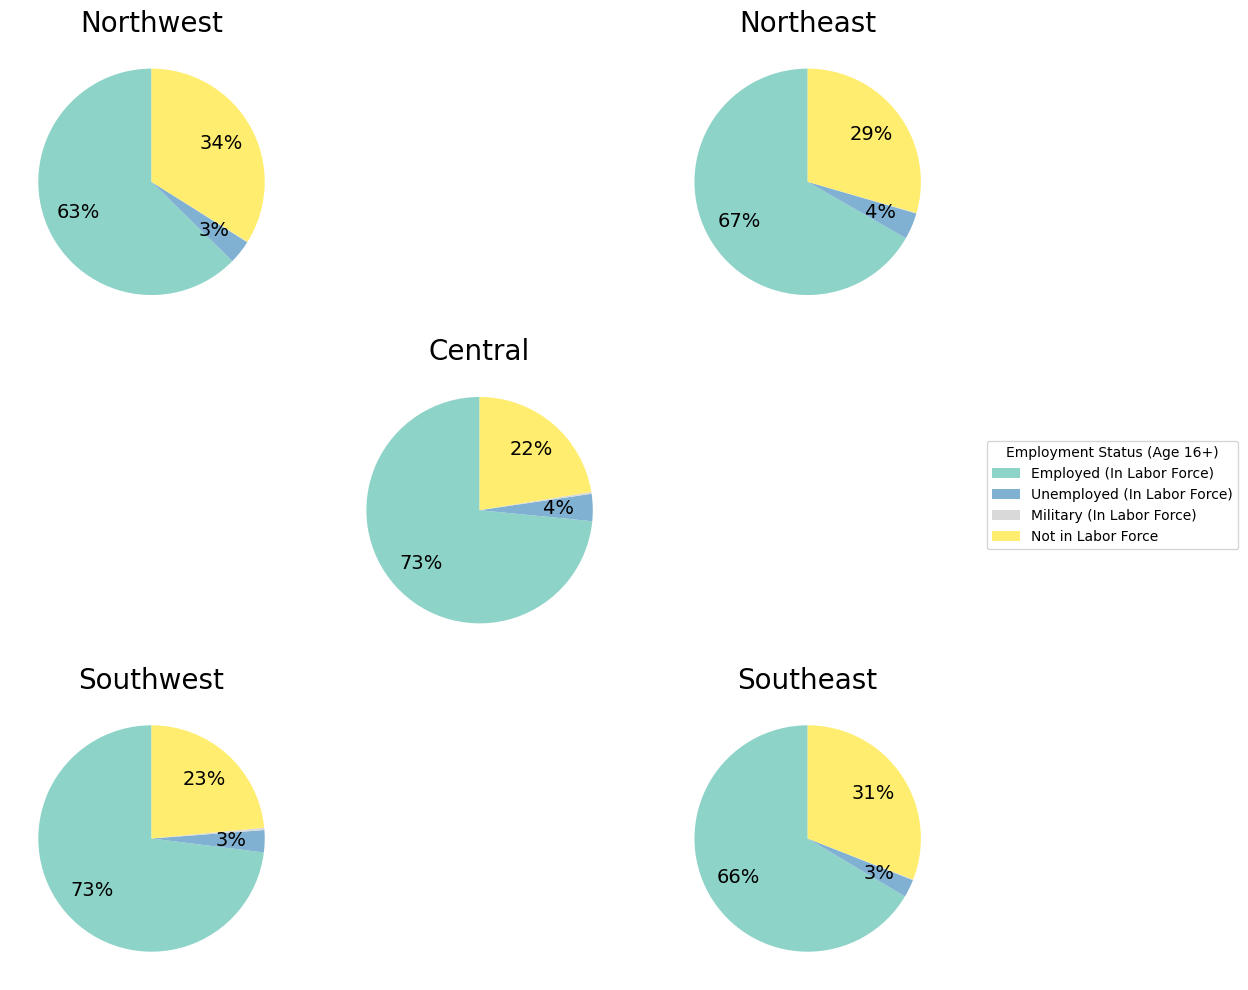

In [14]:
plot_employment_status(df)

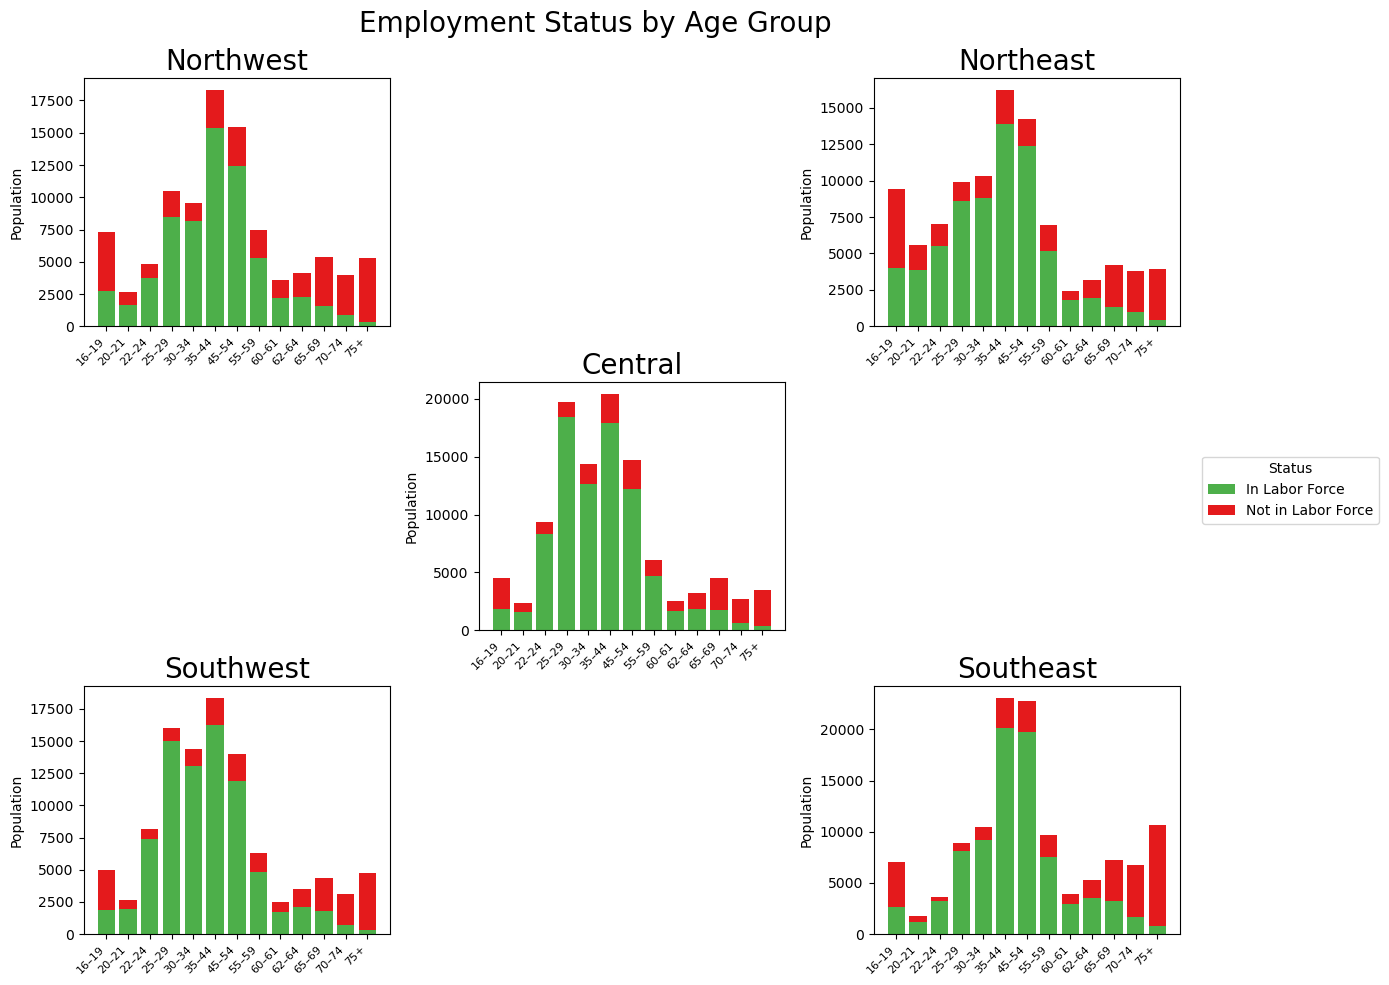

In [15]:
plot_stacked_labor_force(df, "Employment Status by Age Group", normalize=False)

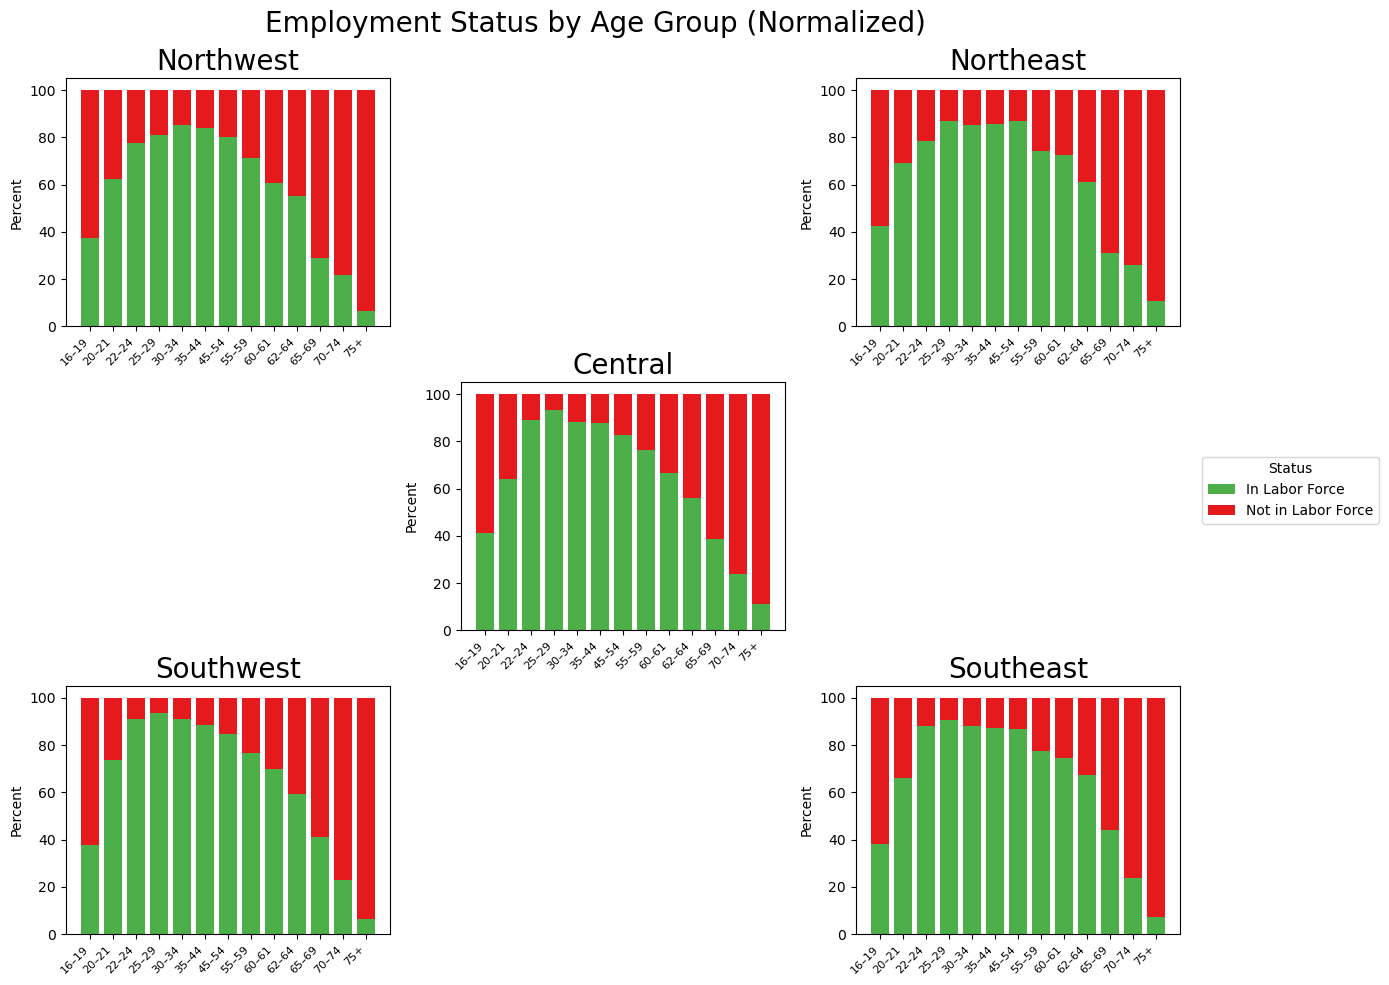

In [16]:
plot_stacked_labor_force(df, "Employment Status by Age Group (Normalized)", normalize=True)

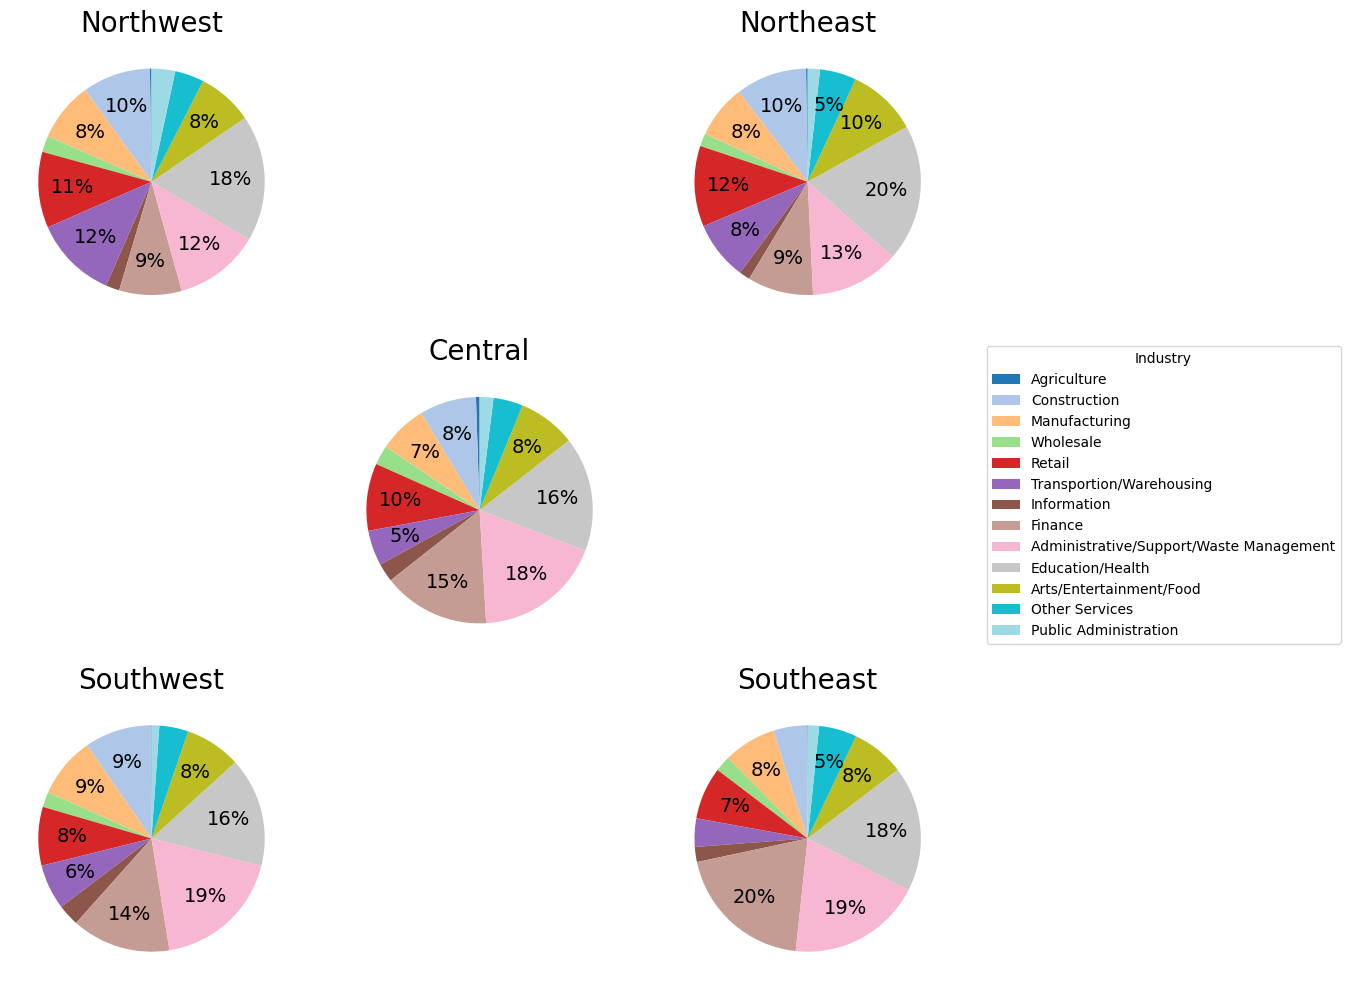

In [17]:
plot_industry(df, cmap_name='tab20')

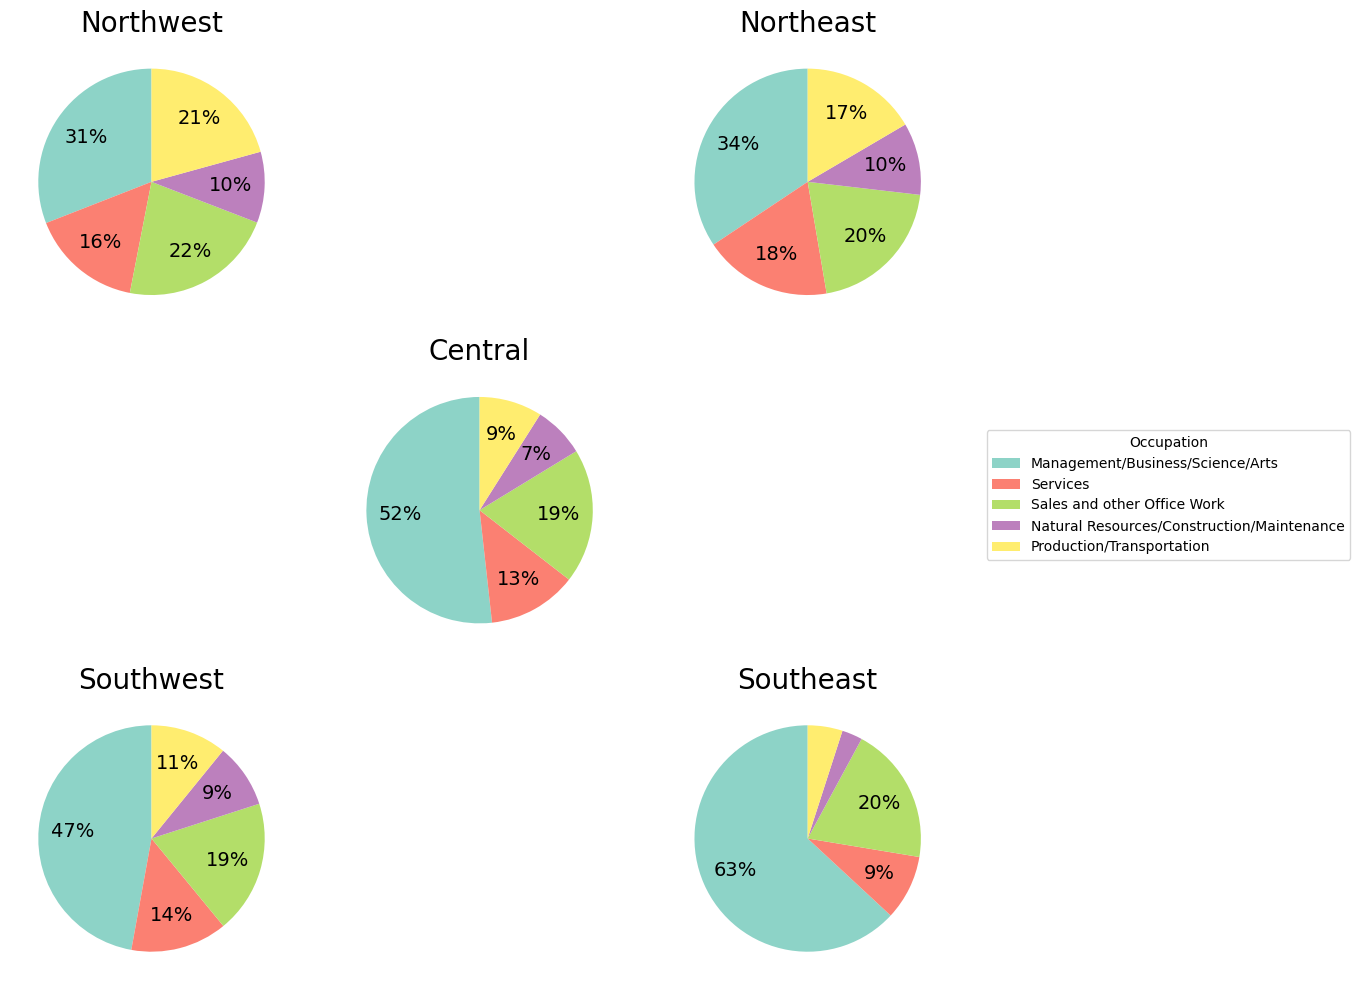

In [18]:
plot_occupation(df, cmap_name='Set3')

## Health Insurance

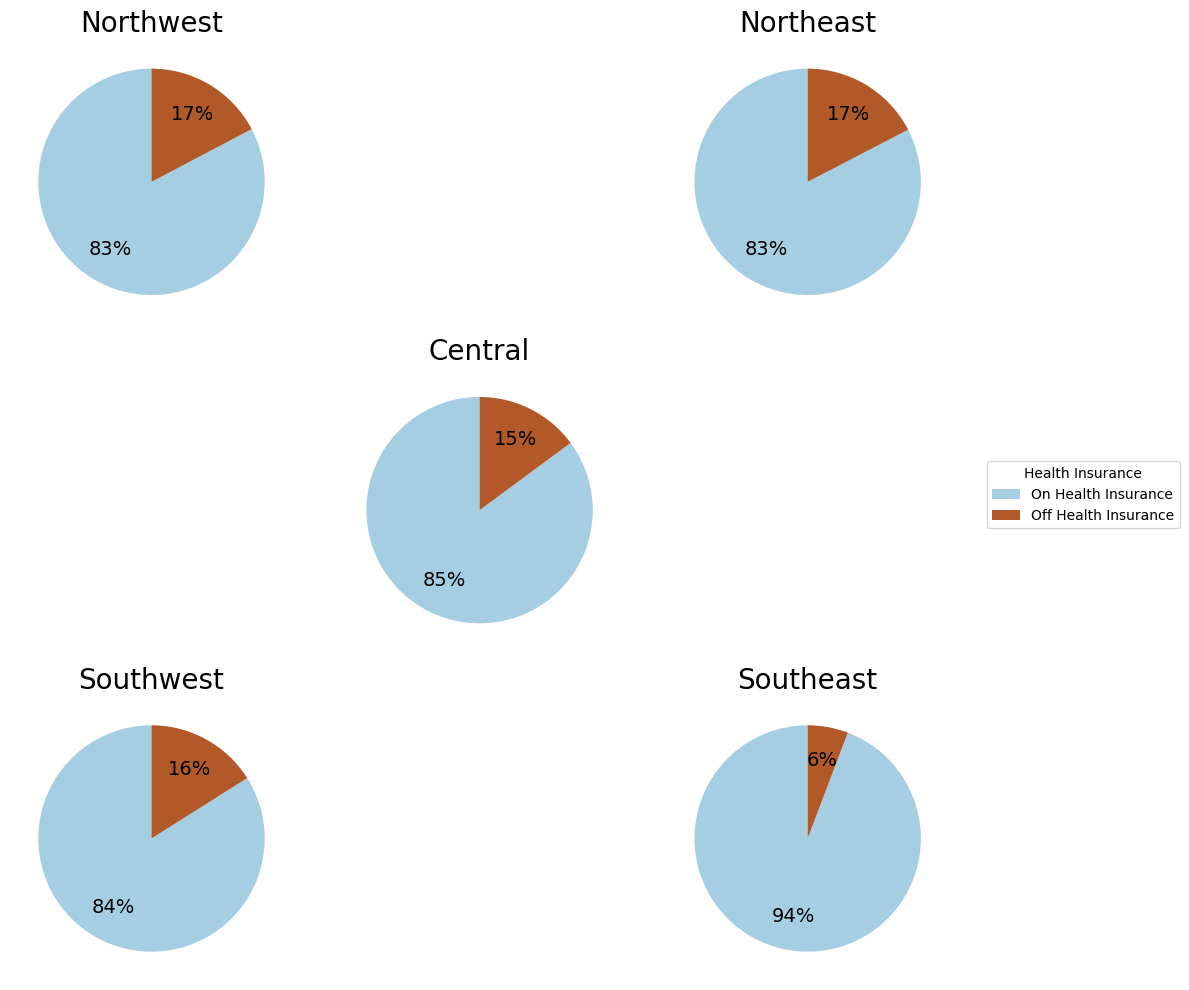

In [19]:
plot_insurance(df, cmap_name='Paired')

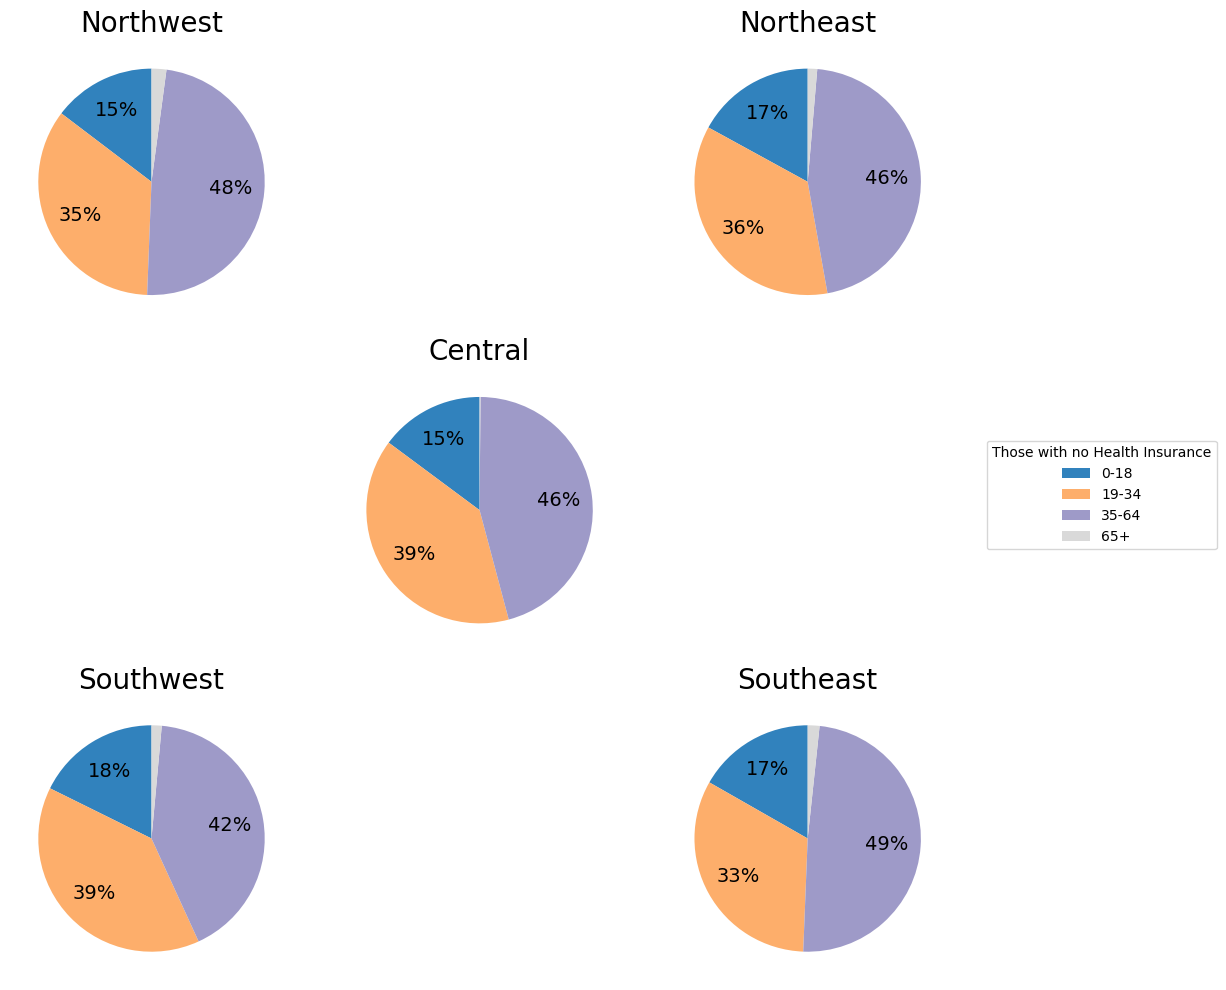

In [20]:
plot_no_insurance(df, cmap_name='tab20c')

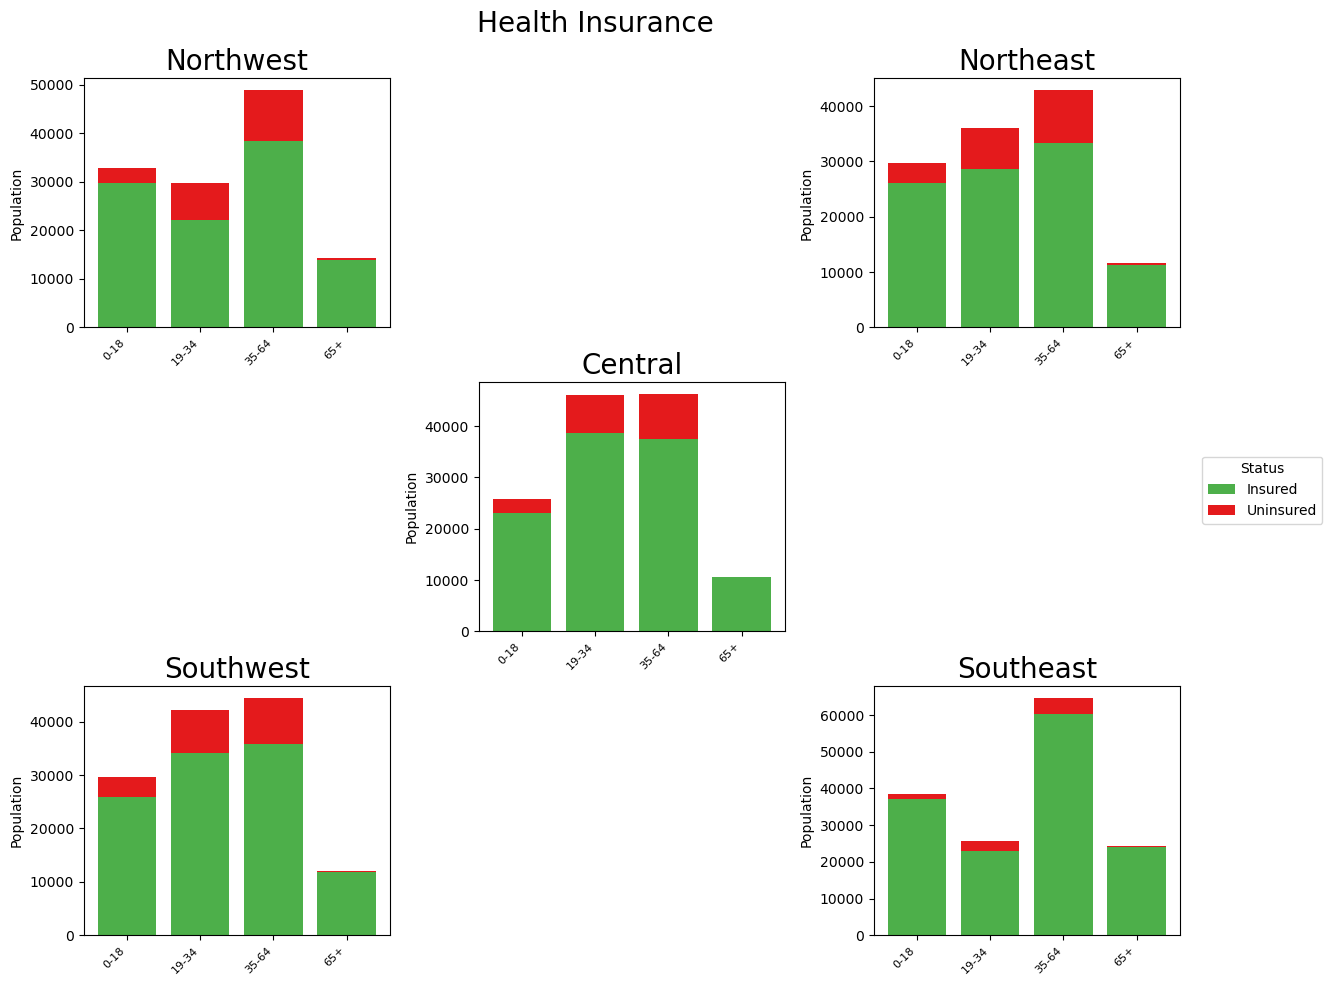

In [21]:
plot_stacked_health_insurance(df, 'Health Insurance', normalize=False)

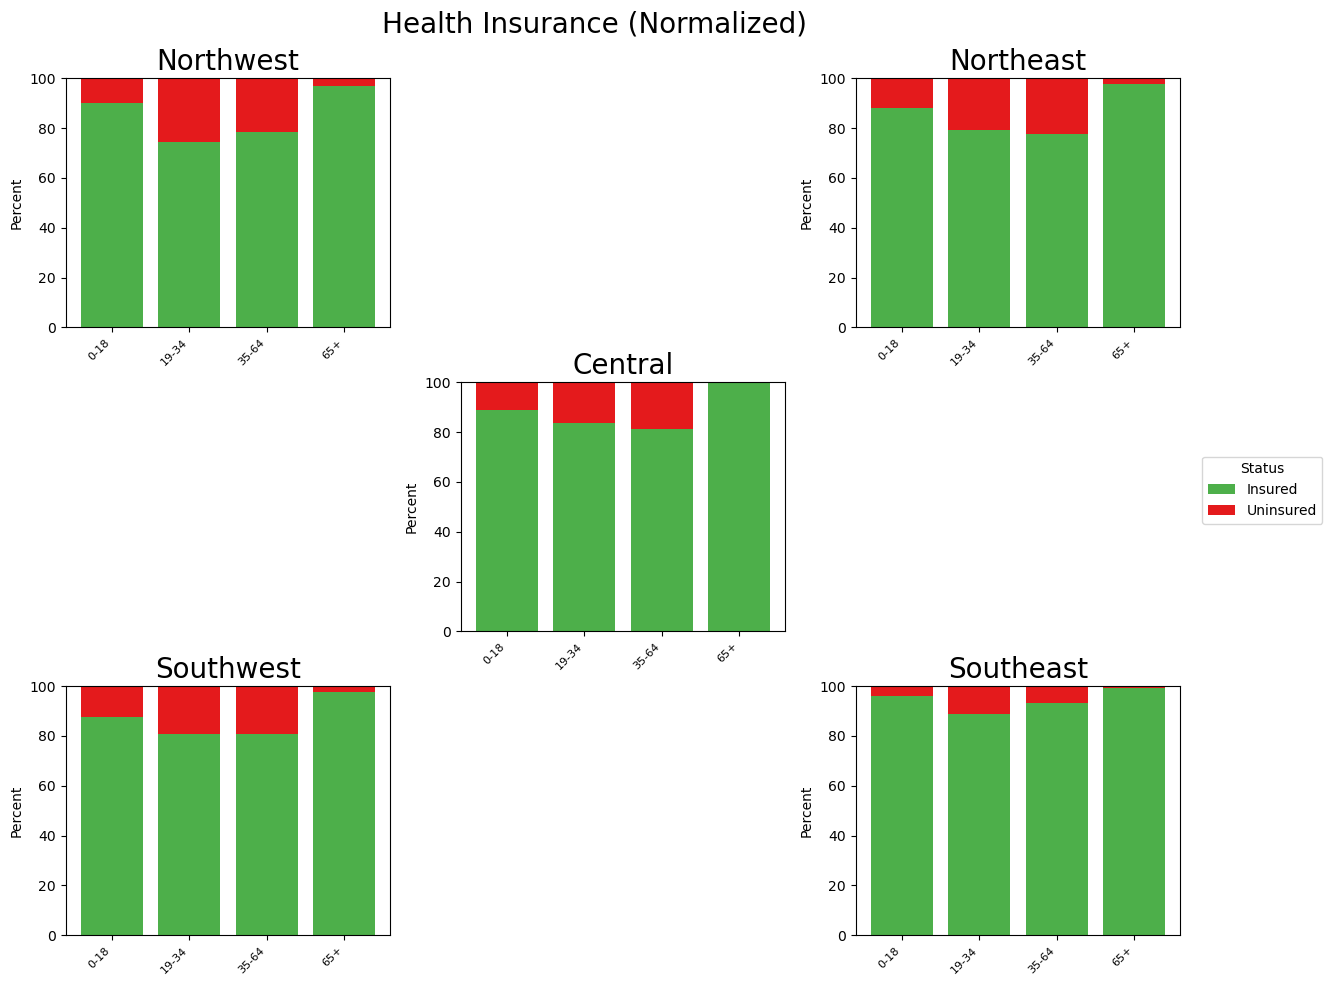

In [22]:
plot_stacked_health_insurance(df, 'Health Insurance (Normalized)', normalize=True)

## Transportation

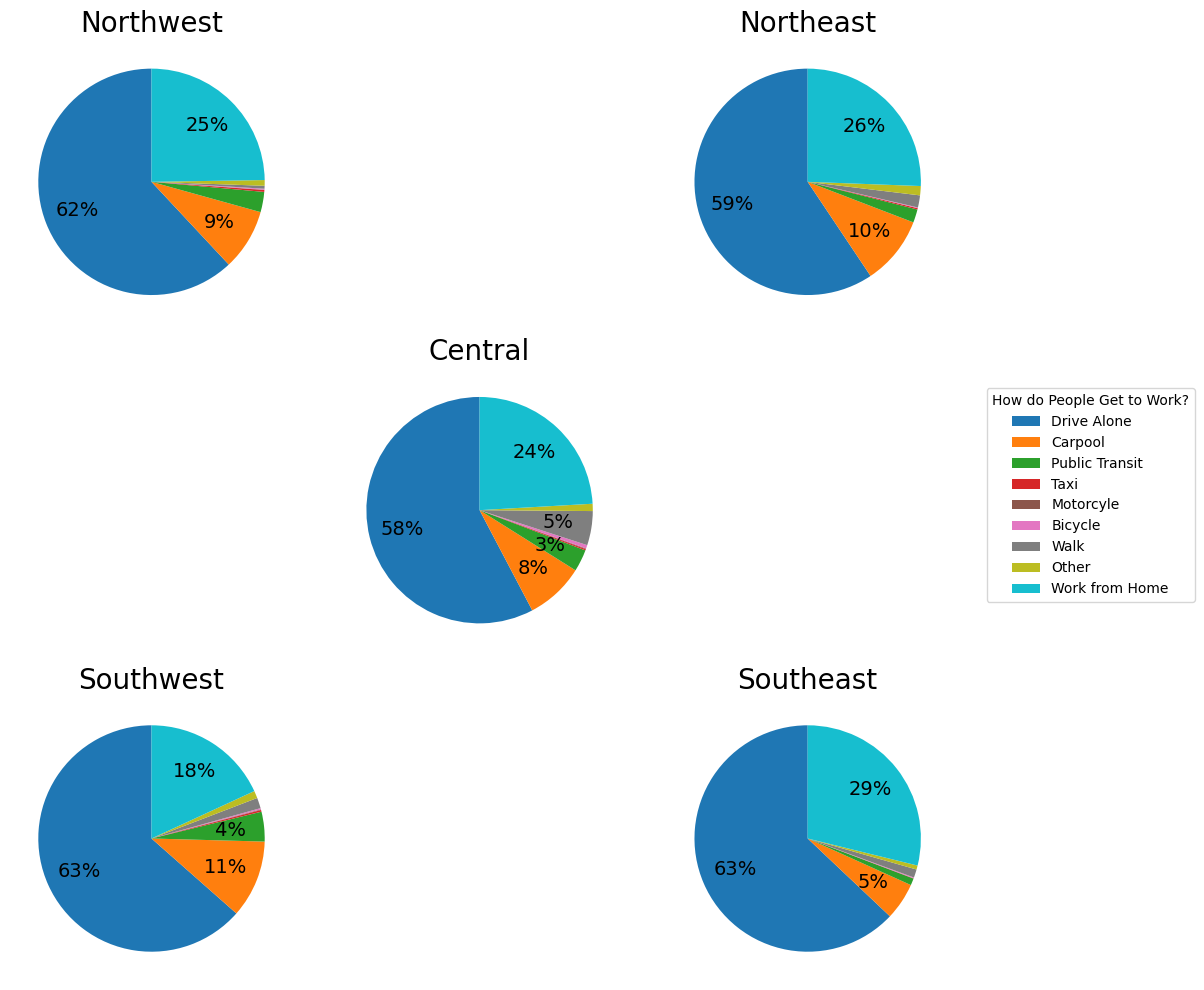

In [23]:
plot_transportation(df, cmap_name='tab10')

In [24]:
assert False

AssertionError: 

In [ ]:
def plot_pie_map(df, title, cols, labels, cmap_name="Set2", annotate=True, min_pct_label=5, wedge_fs=12, title_fs=12, legend_fs=10):
    """
    Plot pie charts for each PUMA in a 3x3 grid layout.
    
    Parameters
    ----------
    df : DataFrame
        Your data, with one row per location and columns matching `cols`.
    title : str
        Title for the legend.
    cols : list of str
        Column names to plot.
    labels : list of str
        Labels for legend entries.
    cmap_name : str
        Name of the Matplotlib colormap to use (default "Set2").
    annotate : bool
        If True, manually annotate slices with percentages (default True).
    min_pct_label : float
        Minimum % value for annotation to avoid clutter.
    """

    # choose colors from colormap
    cmap = plt.colormaps[cmap_name]
    colors = cmap(np.linspace(0, 1, len(cols)))

    # grid structure same as race chart
    fig = plt.figure(figsize=(10, 10))
    gs = gridspec.GridSpec(3, 3, figure=fig)

    positions = {
        'Northwest': (0, 0),
        'Northeast': (0, 2),
        'Central': (1, 1),
        'Southwest': (2, 0),
        'Southeast': (2, 2),
    }

    axes = {}
    for loc, (row, col) in positions.items():
        ax = fig.add_subplot(gs[row, col])
        axes[loc] = ax

        row_data = df[df['location'] == loc][cols].iloc[0]

        if not annotate:
            wedges, texts, autotexts = ax.pie(
                row_data,
                labels=None,
                colors=colors,
                autopct='%1.0f%%',
                startangle=90
            )
        else:
            wedges, texts = ax.pie(
                row_data,
                labels=None,
                colors=colors,
                autopct=None,
                startangle=90
            )
            total = row_data.sum()
            for i, wedge in enumerate(wedges):
                pct = 100 * row_data.iloc[i] / total
                if pct >= min_pct_label:
                    ang = (wedge.theta2 + wedge.theta1) / 2
                    x = wedge.r * 0.7 * np.cos(np.deg2rad(ang))
                    y = wedge.r * 0.7 * np.sin(np.deg2rad(ang))
                    ax.text(x, y, f"{pct:.0f}%", ha="center", va="center", fontsize=wedge_fs)

        ax.set_title(loc, fontsize=title_fs)

    # One legend outside
    fig.legend(
        labels, loc="center left", bbox_to_anchor=(1, 0.5),
        title=title, fontsize=legend_fs
    )

    plt.tight_layout()
    plt.show()
    
def plot_hispanic(df, cmap_name='tab10', **kwargs):

    cols = ['hispanic_pct', 'non_hispanic_pct']
    labels = ['Hispanic', 'Non-Hispanic']

    plot_pie_map(df, title='Hispanic/Non-Hispanic', cols=cols, labels=labels, cmap_name=cmap_name, **kwargs)

In [ ]:
plot_hispanic(df, cmap_name='tab10', title_fs=20, wedge_fs=14, legend_fs=12)